In [8]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

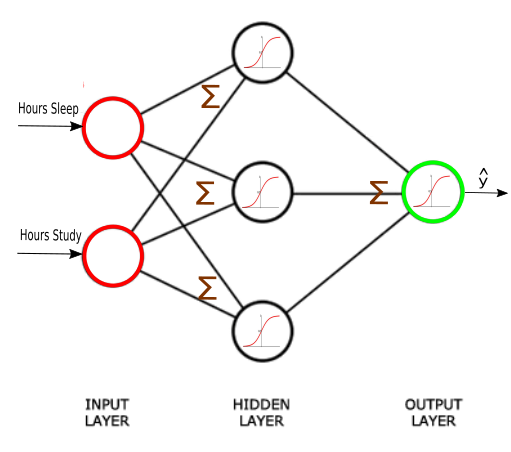

In [7]:
'''
HOURS STUDIED     HOURS SLEPT        	        TEST SCORE 
    2                  9	                         92
    1                  5	                         86
    3                  6	                         89
    5                  10	                         ?


 (2 * .2) + (9 * .8) = 7.6      S(7.6) = 0.999499799
 (2 * .6) + (9 * .3) = 3.9      S(7.5) = 1.000553084
 (2 * .1) + (9 * .7) = 6.5      S(6.5) = 0.998498818


(.9994 * .4) + (1.000 * .5) + (.9984 * .9) = 1.79832     S(1.79832) = .8579443067
''';

In [9]:
xAll = np.array(([2, 9], [1, 5], [3, 6], [5, 10]), dtype=float)   #(hours studying, hours sleeping)
xAll

array([[ 2.,  9.],
       [ 1.,  5.],
       [ 3.,  6.],
       [ 5., 10.]])

In [10]:
# scaling input data
xAll = xAll/np.amax(xAll, axis=0)   
xAll

array([[0.4, 0.9],
       [0.2, 0.5],
       [0.6, 0.6],
       [1. , 1. ]])

In [11]:
y = np.array(([92], [86], [89]), dtype=float)   # y = score on test
y

array([[92.],
       [86.],
       [89.]])

In [12]:
# scaling output data (max test score is 100)
y = y/100      
y

array([[0.92],
       [0.86],
       [0.89]])

In [13]:
# training data
X = np.split(xAll, [3])[0]           
X

array([[0.4, 0.9],
       [0.2, 0.5],
       [0.6, 0.6]])

In [14]:
xtest = np.split(xAll, [3])[1]   # testing data
xtest

array([[1., 1.]])

In [39]:
class Neural_Network(object):
    def __init__(self):
        self.inputSize  = 2
        self.outputSize = 1
        self.hiddenSize = 3
        self.W1 = np.random.randn(self.inputSize, self.hiddenSize)    # (3x2) weight matrix from input to hidden layer
        self.W2 = np.random.randn(self.hiddenSize, self.outputSize)   #(3x1) weight matrix from hidden to output layer

    #forward propagation 
    def forward(self, X):
        self.z  = np.dot(X, self.W1)          # dot product of X (input) and first set of 3x2 weights
        self.z2 = self.sigmoid(self.z)        # activation function
        self.z3 = np.dot(self.z2, self.W2)    # dot product of hidden layer (z2) and second set of 3x1 weights
        o = self.sigmoid(self.z3)             # final activation function
        return o

    # activation function
    def sigmoid(self, s):
        return 1/(1+np.exp(-s))
    
    # Backward Propagate
    def sigmoidPrime(self, s):
        return s * (1 - s)

    def backward(self, X, y, o):
        self.o_error = y - o                                     # error in output
        self.o_delta = self.o_error*self.sigmoidPrime(o)         # applying derivative of sigmoid to error

        self.z2_error = self.o_delta.dot(self.W2.T)   # z2 error: how much our hidden layer weights contributed to output error
        self.z2_delta = self.z2_error*self.sigmoidPrime(self.z2) # applying derivative of sigmoid to z2 error

        self.W1 += X.T.dot(self.z2_delta)                        # adjusting first set (input --> hidden) weights
        self.W2 += self.z2.T.dot(self.o_delta)                   # adjusting second set (hidden --> output) weights
 
    def train(self, X, y):
        o = self.forward(X)
        self.backward(X, y, o)        
    
    def saveWeights(self):
        np.savetxt("w1.txt", self.W1, fmt="%s")
        np.savetxt("w2.txt", self.W2, fmt="%s")    
    
    def predict(self):
        print( "Predicted data based on trained weights: ");
        print( "Input (scaled): \n" + str(xPredicted));
        print( "Output: \n" + str(self.forward(xPredicted)));       
    
    def think(self, inputs):
        #pass inputs through our single neuron(our single neuron)
        return self.___sigmoid(dot(inputs, self.synaptic_weights))        

In [40]:
NN = Neural_Network()

In [41]:
o = NN.forward(X)    
o

array([[0.56241414],
       [0.60985116],
       [0.58238399]])

In [42]:
y

array([[0.92],
       [0.86],
       [0.89]])

In [43]:
NN = Neural_Network()

In [44]:
for i in range(3):                          
    print ("iteration:" + str(i) )
    k=np.mean(np.square(y - NN.forward(X)))    # mean sum squared loss
    print ("Loss: " + str(k))       
    print ("\n")
    NN.train(X, y)

iteration:0
Loss: 0.08727834087405056


iteration:1
Loss: 0.05871563959556778


iteration:2
Loss: 0.04134372504174521


